In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix

In [292]:
data = pd.read_csv("car_evaluation.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [293]:
samples, features = data.shape
samples_per_class = data.groupby("class").count()
diff_number_of_doors = data.groupby("doors").count()
diff_luggage_size = data.groupby("lug_boot").count()
print(f"""Samples: {samples}
Features: {features}

Samples per class: 
{samples_per_class}

Different number of doors:
{diff_number_of_doors}

Diffrent luggage sizes: 
{diff_luggage_size}""")

Samples: 1728
Features: 7

Samples per class: 
       buying  maint  doors  persons  lug_boot  safety
class                                                 
acc       384    384    384      384       384     384
good       69     69     69       69        69      69
unacc    1210   1210   1210     1210      1210    1210
vgood      65     65     65       65        65      65

Different number of doors:
       buying  maint  persons  lug_boot  safety  class
doors                                                 
2         432    432      432       432     432    432
3         432    432      432       432     432    432
4         432    432      432       432     432    432
5more     432    432      432       432     432    432

Diffrent luggage sizes: 
          buying  maint  doors  persons  safety  class
lug_boot                                              
big          576    576    576      576     576    576
med          576    576    576      576     576    576
small        576   

In [294]:
# Transform categorical variables into numerical values
enc = OrdinalEncoder()
data_encoded = enc.fit_transform(data)
print(data_encoded[:5,:])

[[3. 3. 0. 0. 2. 1. 2.]
 [3. 3. 0. 0. 2. 2. 2.]
 [3. 3. 0. 0. 2. 0. 2.]
 [3. 3. 0. 0. 1. 1. 2.]
 [3. 3. 0. 0. 1. 2. 2.]]


In [295]:
print(data.isna().sum())
# There is no empty values in the dataset, but impute anyway?

knn_imp = KNNImputer(n_neighbors=1)
X = knn_imp.fit_transform(data_encoded)

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [296]:
y = data.pop("class")

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [298]:
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)

SVC()

In [299]:
knc = KNeighborsClassifier(n_neighbors=3, metric="manhattan")
knc.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [300]:
lg = LogisticRegression(solver="liblinear")
lg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [301]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print(f"DTree depth: {dtree.get_depth()}")

DTree depth: 2


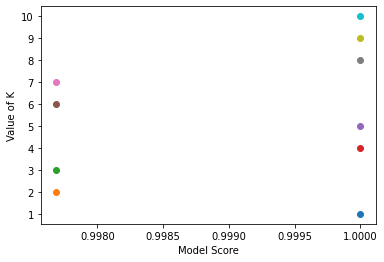

In [302]:
plt.figure()
plt.xlabel("Model Score")
plt.ylabel("Value of K")
plt.yticks(range(1, 11))
for i in range(1, 11):
    knc.n_neighbors = i
    knc.fit(X_train, y_train)
    score = knc.score(X_test, y_test)
    plt.scatter(score, i)
plt.show()

## All values of K perform great, but it seems that K value of 1 performs the best most consistently.

In [303]:
# Calculate the average precision, recall and fscore of whole model
prf = precision_recall_fscore_support(y_test, svc.predict(X_test), average="macro")
print(f"""SVC
Training set score: {svc.score(X_train, y_train)}
Testing set score: {svc.score(X_test, y_test)}
Precision, recall, F1 (for each class, in order): {prf[0]}, {prf[1]}, {prf[2]}
""")

prf = precision_recall_fscore_support(y_test, knc.predict(X_test), average="macro")
print(f"""KNN
Training set score: {knc.score(X_train, y_train)}
Testing set score: {knc.score(X_test, y_test)}
Precision, recall, F1 (for each class, in order): {prf[0]}, {prf[1]}, {prf[2]}
""")

prf = precision_recall_fscore_support(y_test, lg.predict(X_test), average="macro")
print(f"""Logistic Regression
Training set score: {lg.score(X_train, y_train)}
Testing set score: {lg.score(X_test, y_test)}
Precision, recall, F1 (for each class, in order): {prf[0]}, {prf[1]}, {prf[2]}
""")

prf = precision_recall_fscore_support(y_test, dtree.predict(X_test), average="macro")
print(f"""Decision Tree
Training set score: {dtree.score(X_train, y_train)}
Testing set score: {dtree.score(X_test, y_test)}
Precision, recall, F1 (for each class, in order): {prf[0]}, {prf[1]}, {prf[2]}
""")

SVC
Training set score: 1.0
Testing set score: 1.0
Precision, recall, F1 (for each class, in order): 1.0, 1.0, 1.0

KNN
Training set score: 1.0
Testing set score: 1.0
Precision, recall, F1 (for each class, in order): 1.0, 1.0, 1.0

Logistic Regression
Training set score: 0.9259259259259259
Testing set score: 0.9236111111111112
Precision, recall, F1 (for each class, in order): 0.5961476466795615, 0.5295998349834984, 0.5342867575462512

Decision Tree
Training set score: 1.0
Testing set score: 1.0
Precision, recall, F1 (for each class, in order): 1.0, 1.0, 1.0



C:\Users\razor\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


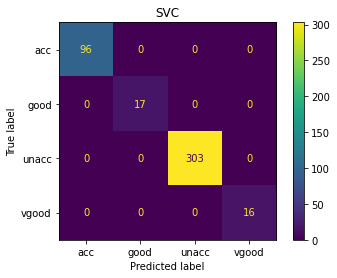

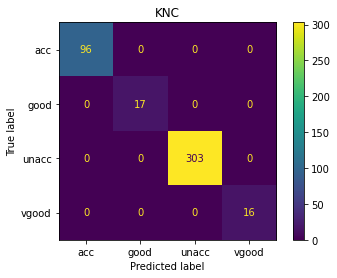

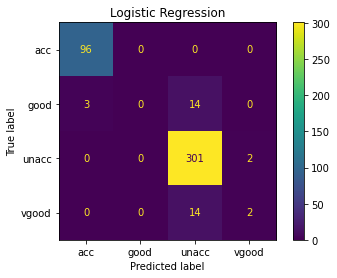

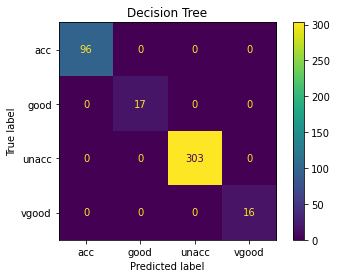

In [304]:
plot_confusion_matrix(svc, X_test, y_test)
plt.title("SVC")
plt.show()

plot_confusion_matrix(knc, X_test, y_test)
plt.title("KNC")
plt.show()

plot_confusion_matrix(lg, X_test, y_test)
plt.title("Logistic Regression")
plt.show()

plot_confusion_matrix(dtree, X_test, y_test)
plt.title("Decision Tree")
plt.show()

## According to the scores, metrics and the confusion matrix it seems that every model performs almost flawlessly on this dataset except Logistic Regression, which performs very poorly, and misclassifies quite a bit.